<a href="https://colab.research.google.com/github/Mayank1911/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis_Mayank_Sawant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Booking Analysis



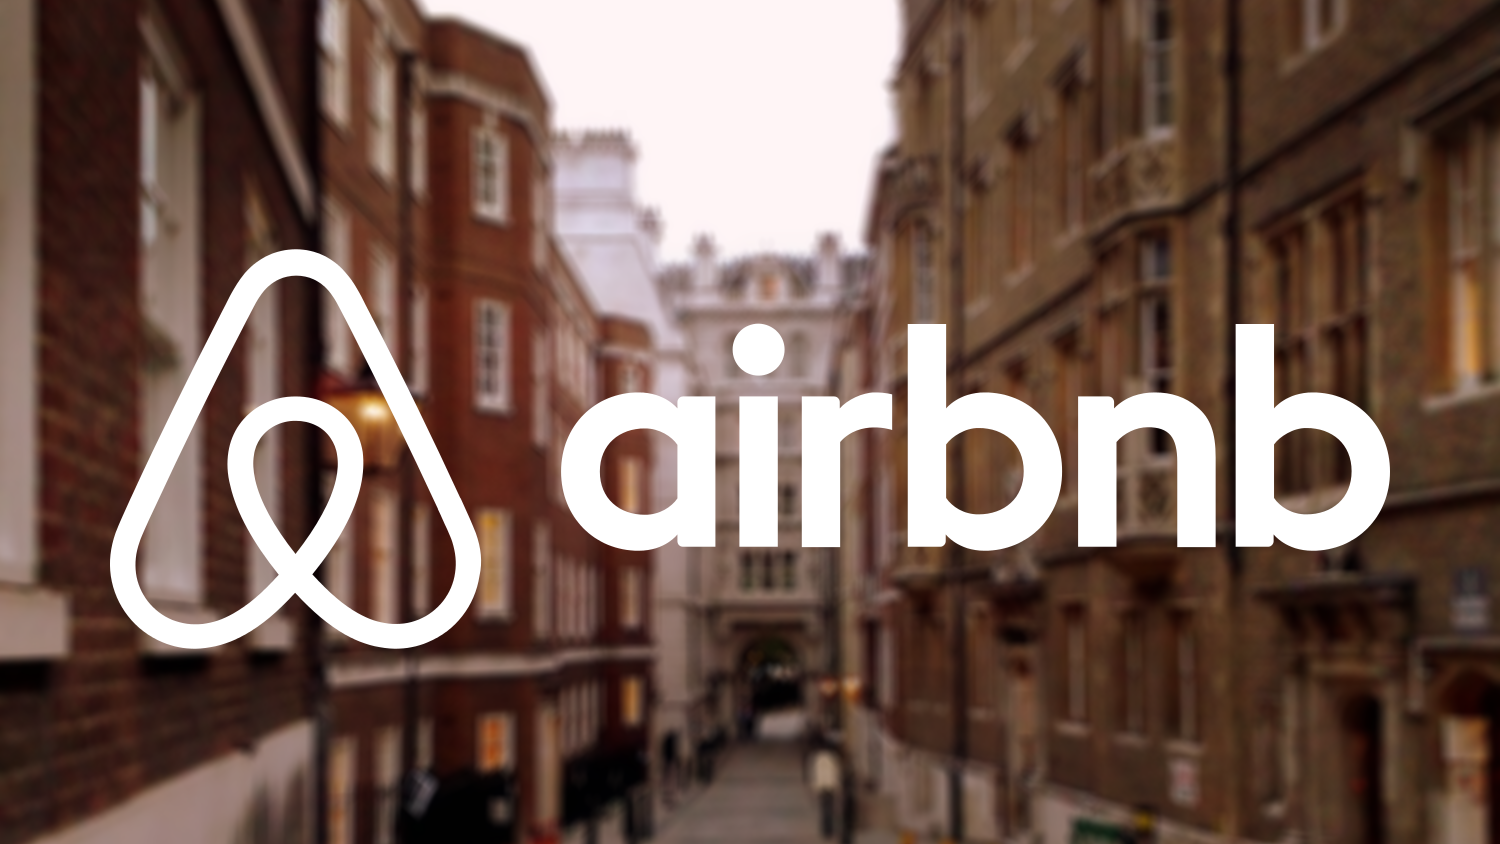

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1** -  $\color{green}{\text{Mayank Sawant}}$



# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Data Cleaning

**Exploratory data analysis(EDA) :**

1. What can we learn about different hosts and areas?
2. Which are the hottest areas of transaction?
3. How are reviews are compared with neighbourhood groups?
4. What price distribution tells us?
5. Which hosts are the busiest and why?
6. What types of rooms are prefered by people respective to the regions?
7. How room types are distributed among neighbourhood groups?

# **GitHub Link -**

https://github.com/Mayank1911/Airbnb-Booking-Analysis

# **Problem Statement**


## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>



#### **Define Your Business Objective?**

The business objective for this Airbnb Booking Analysis project is to leverage the dataset's insights to inform strategic decisions and improve various aspects of Airbnb's operations. This includes optimizing security measures, enhancing customer and host experiences, making data-driven business decisions, tailoring marketing strategies, and potentially introducing innovative services. Ultimately, the goal is to utilize data analysis to drive growth, efficiency, and customer satisfaction within the Airbnb platform.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing necessary libraries for analyzing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing dataset
df = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# first view
df.head()

### Dataset Rows & Columns count

In [ ]:
# Checking the shape of dataset
print(f'The shape of dataset is {df.shape}')

### Dataset Information

In [ ]:
# Checking the information of the dataset
df.info()

#### Duplicate Values

In [ ]:
# Count of duplicate values in Dataset
len(df[df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Checking the null values
print(f'The missing values before cleaning the data are:')
df.isnull().sum()

### What did you know about your dataset?

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## ***2. Understanding Your Variables***

In [ ]:
# Checking the feature names
print(f'The names of the feature present in the dataset are:')
list(df.columns)

In [ ]:
# Dataset Describe
df.describe()

### Variables Description

 'id' - ID for each listing

 'name' - Name of each listing

 'host_id' - Host ID

 'host_name' - Host Name

 'neighbourhood_group' - Neighbourhood Group of the listing

 'neighbourhood' - Neighbourhood of the listing

 'latitude' - Latitude coord of the listing

 'longitude' - Longitude coord of the listing

 'room_type' - Room Type of listing

 'price' - Price of listing

 'minimum_nights' - Minimum Nights of the listing

 'number_of_reviews' - Number of reviews of the listing

 'last_review' - Last review of the listing

 'reviews_per_month' - Reviews per month of the listing

 'calculated_host_listings_count' - Calculated Host Listings Count of the listing

 'availability_365' - Available for whole year

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [ ]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Filling missing values
df['name'].fillna('Absent',inplace = True)
df['host_name'].fillna('Absent',inplace = True)

### What all manipulations have you done and insights you found?

Filled missing values in Name and Host Name columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Lets see who has the most listings and in which neighbourhood
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)

# Visualizing the host with most listings
plt.figure(figsize = (10,7))
host_name = top_hosts['host_name']
host_listing = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_listing)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Hosts Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show

##### 1. Why did you pick the specific chart?

To learn about different hosts and areas.

##### 2. What is/are the insight(s) found from the chart?

**From above result, we can conclude that the name of the host with most listings is Sonder(NYC) which has 327 listings in Manhattan.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 2

In [ ]:
# Number of Airbnb listed in each neighbourhood
data = df.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by = 'count', ascending = False)

# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = data ['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of Listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

##### 1. Why did you pick the specific chart?

To find top neighbourhoods in NYC in terms of listings

##### 2. What is/are the insight(s) found from the chart?

**Around 85% of listings are held in neighbourhood groups Manhattan and Brooklyn.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 3

In [ ]:
# Exploring neighbourhood
df['neighbourhood'].value_counts().iloc[:10]

# Listing all neighbourhoods
df['neighbourhood'].unique()

# Using wordcloud to visualize hottest neighbourhoods
wordcloud = WordCloud(background_color = 'white').generate(" ".join(df['neighbourhood']))
plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Visualizing it through pie chart
plt.figure(figsize = (7,7))
df['neighbourhood'].value_counts().iloc[:5].plot(kind = 'pie', autopct = '%1.0f%%', startangle = 360, fontsize = 16)

##### 1. Why did you pick the specific chart?

To find out which neigbourhoods are important in NYC.

##### 2. What is/are the insight(s) found from the chart?

**In terms of listings, Bedford Stuyvesant, Hell Kitchen, East Side are the most important neighbourhoods in NYC.**

**Williamsburg is the hottest area of transaction.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 4

In [ ]:
# Finding which neighbourhood has got maximum number of reviews
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews,labels = areas_reviews['neighbourhood_group'], autopct= '%0.2f%%', startangle = 90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True)
plt.title('Number of reviews in each neighbourhood group', {'fontsize' : 18})
plt.show()

##### 1. Why did you pick the specific chart?

To find the share percentage of reviews for each neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

**The share percentage of reviews for each neighbourhood group is depicted above.It can be stated that Queens, Manhattan has majority of reviews which implies that people are liking these neighbourhoods. Also from these neighbourhoods majority revenue is generated for the company.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 5

In [ ]:
# Now lets see the price distribution by neighbourhood groups
plt.figure(figsize = (12,8))
ax = sns.violinplot(x = 'neighbourhood_group', y = 'price', data = df[df.price < 200]).set_title('Price Distribution by neighbourhood groups')
plt.show()

##### 1. Why did you pick the specific chart?

To view the price distribution of neighbourhood group in NYC.

##### 2. What is/are the insight(s) found from the chart?

**By looking at the violin plot, we can see that Manhattan has a higher price range and is the most expensive one. Brooklyn has the second highest rental prices, while the Bronx appears as the most affordable one.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 6

In [ ]:
# Busiest would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = df.groupby(['host_name','neighbourhood_group'])['host_id'].count().sort_values(ascending=False).head(10)
busiest_hosts

# Visualising the busiest host data through bar plot
plt.figure(figsize=(12, 8))
plt.title("Hosts in different areas")
busiest_hosts.plot(kind='bar', fontsize = 16, xlabel = 'Hosts', ylabel = 'Count')

##### 1. Why did you pick the specific chart?

To find busiest hosts in NYC.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 busiest hosts. Sonder (NYC) is the busiest host in NYC. Also, most hosts are from the Manhattan neighbourhood group.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 7

In [ ]:
# Plotting histogram for room types to look for which are most preferred room types
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(df['room_type'])
hp.set_xlabel('Room type')
hp.set_ylabel('Number of listings')
plt.show()

##### 1. Why did you pick the specific chart?

To view the distribution of room type by number of listings.

##### 2. What is/are the insight(s) found from the chart?

**People mostly prefer to rent Private room or Entire home/apt. Very few people are considering to a share a room.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 8

In [ ]:
#plotting room type as per neighbourhood group
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

##### 1. Why did you pick the specific chart?

To find the room type distribution across neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

**Entire home is the highest service used across New York City. In Brooklyn, Private rooms are used more than entire home. Shared room type is very less likely to be prefered by people.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 9

In [ ]:
#coordinates of listings as per room type
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC coordinates')

##### 1. Why did you pick the specific chart?

To view the distribution of room types across NYC map.



##### 2. What is/are the insight(s) found from the chart?

**Above scatterplot shows that entire home and private room listings are very dense. There are very few shared room listings as per the location coordinates.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 10

In [ ]:
#coordinates of listings of each neighbourhood group
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df['neighbourhood_group'],palette='bright')
ax.set_title('Location Co-ordinates')

##### 1. Why did you pick the specific chart?

To view the location coordinates of each listing in the neighbourhood

##### 2. What is/are the insight(s) found from the chart?

**Manhattan and Brooklyn are high density neighbourhood groups with respect to listings. Some areas of Staten Island and Bronx are very remotely located which makes them cheaper than other listings.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.
No, there are no insights that lead to negative growth.

#### Chart - 11 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='GnBu')
plt.title('Correlation Matrix')

##### 1. Why did you pick the specific chart?

To find the correlation of the features.

##### 2. What is/are the insight(s) found from the chart?

**Here we can see, independent features are very less correlated to our dependent feature 'Price'.**

#### Chart - 12 - Pair Plot

In [ ]:
# Viewing distribution of numeric data
numerical_data = df.select_dtypes(exclude='object').drop(['id', 'host_id'], axis = 1)
dist= numerical_data.hist(figsize=(15,8), grid = False, color = 'purple')

##### 1. Why did you pick the specific chart?

To view the distribution of numeric data

##### 2. What is/are the insight(s) found from the chart?

**We have plotted the data distribution plots for the numerical features present in the dataset. The distribution shows that most of the features are positively skewed.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Establish a system for ongoing data monitoring and analysis. Airbnb should regularly update its analysis to adapt to changing customer behaviors and market dynamics.

Encourage cross-functional collaboration within the organization, involving teams from marketing, operations, security, and customer support to ensure a holistic approach to implementing insights.

Establish a feedback loop to capture insights from hosts and guests. Continuously gather feedback to fine-tune services and address evolving customer needs.

# **Conclusion**

Conclusions -


1.   Sonder is the busiest host in New York.
2.   Entire home are costly than other room types
3.   Most visitors don’t prefer shared rooms, they tend to visit private room or entire home.
4.   Manhattan has the highest number of listings.
5.   Bronx has most number of cheap rooms.
6.   Queens have more reviews than Manhattan even though Queens has less listings.

